## Дипломная работа по курсу «Python для анализа данных» 

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
import statistics
from scipy import stats
%matplotlib inline

### 1. Загрузить файл hr.csv (можно найти во сложении к заданию) 

In [5]:
df = pd.read_csv('HR.csv', sep=',')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Пропущенных значений нет.
Есть 8 числовых переменных и 2 категориальных.

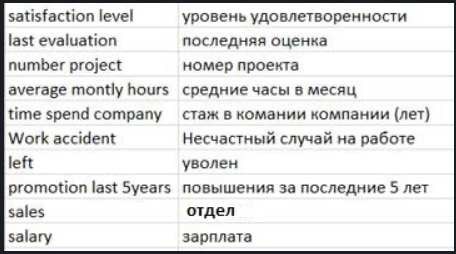

In [7]:
from IPython.display import Image
img = 'pic.png'
Image(filename=img)

In [8]:
df.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


### 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение) 

In [9]:
# Еще раз убедимся что нет пропущенных значений
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [10]:
# Посчитаем статистики
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [20]:
# Посчитаем оставшиеся статистику: моду (50%=медиана).
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df.select_dtypes(include='object').mode()

,sales,salary
0,sales,low


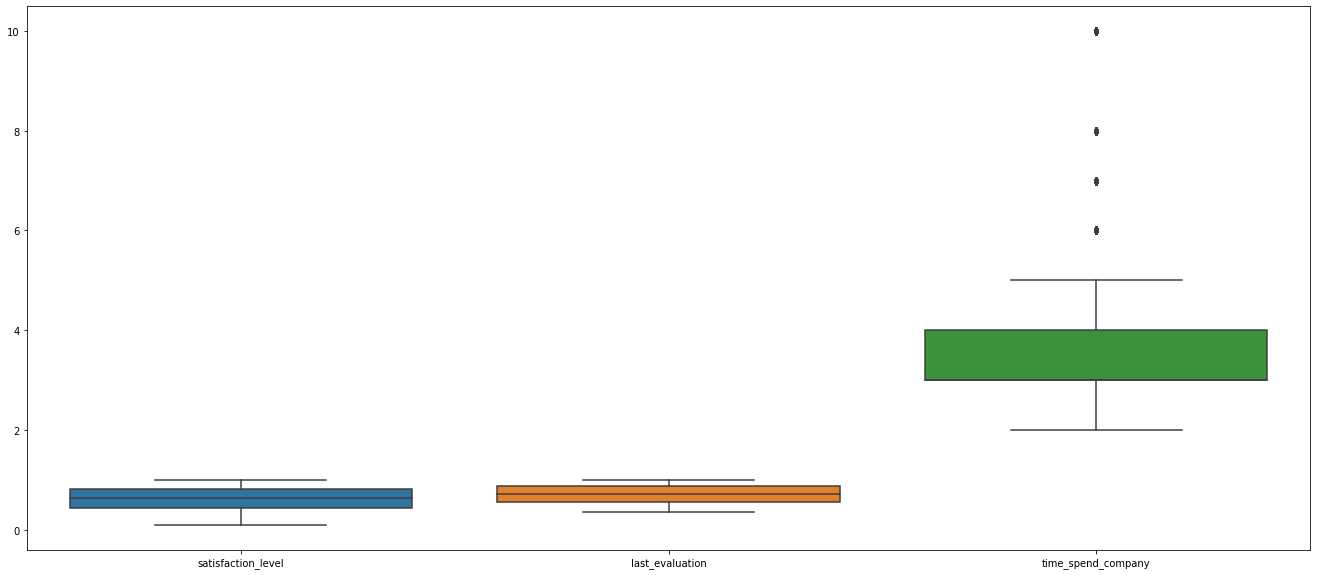

In [17]:
plt.rcParams['figure.figsize'] = (23, 10)
ax = sns.boxplot(data=df[['satisfaction_level', 'last_evaluation', 'time_spend_company']])

### 3. Рассчитать и визуализировать корреляционную матрицу для переменных

In [22]:
corr_matrix = df.corr()
corr_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


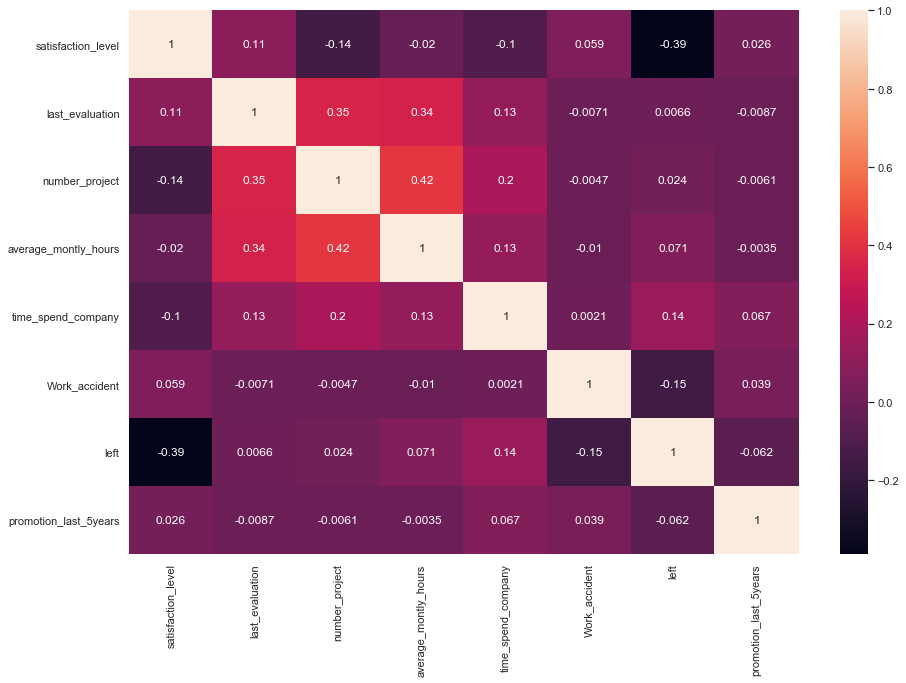

In [25]:
sns.set(rc=({'figure.figsize':(15, 10)}))
sns.heatmap(corr_matrix, annot=True, xticklabels=corr_matrix.columns.values, yticklabels=corr_matrix.columns.values)

Теперь становится понятным как связаны переменные, какие имеют прямую корреляцию, какие обратную.

In [ ]:
# import pandas_profiling
# df.profile_report()

### 4. Визуализировать несколько взаимосвязей между переменными  

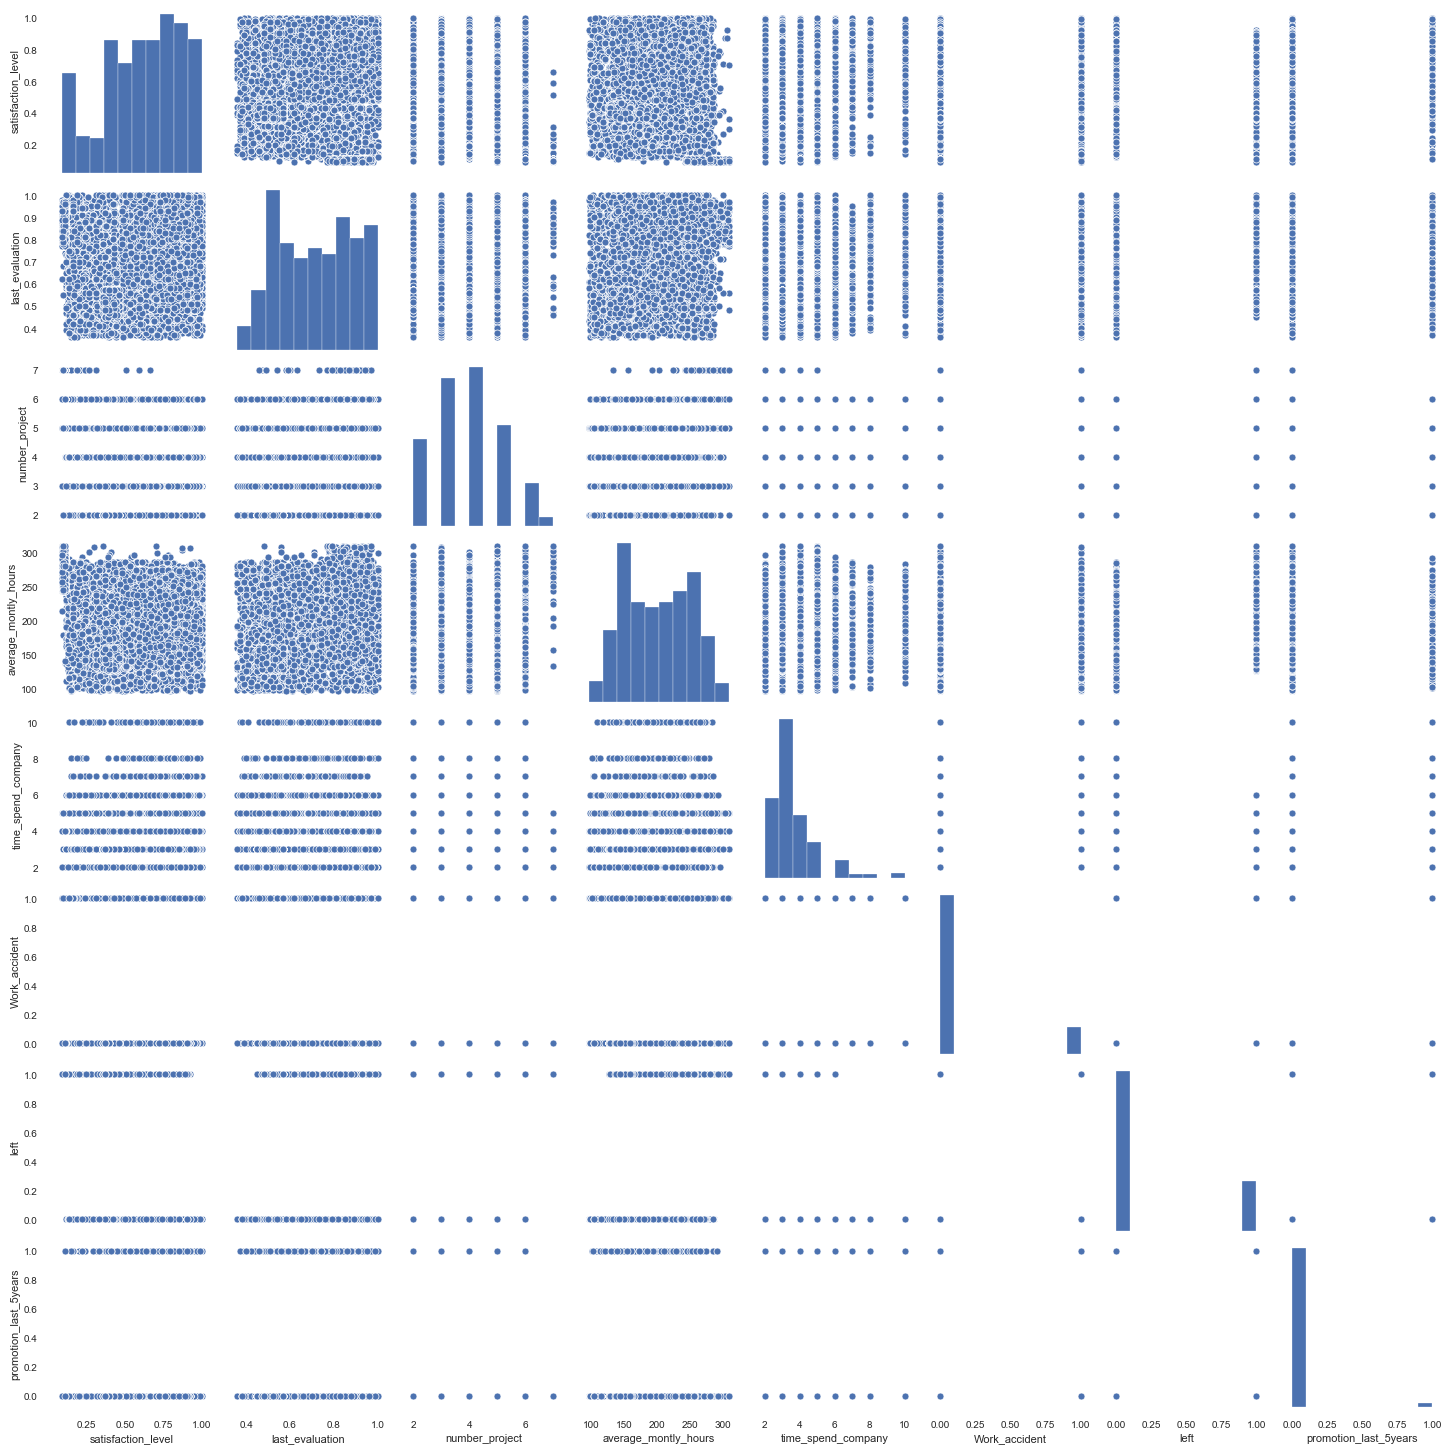

In [29]:
sns.pairplot(df)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


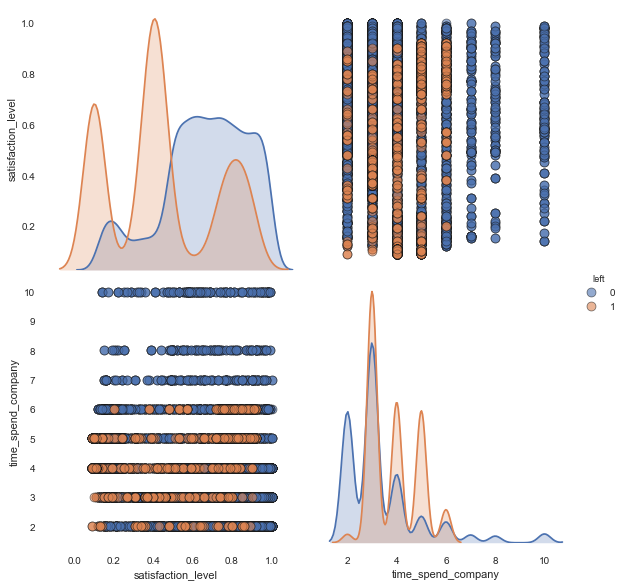

In [54]:
sns.pairplot(df, 
             vars = ['satisfaction_level', 'time_spend_company'],
             hue = 'left', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.show()

По графикам видно, что увольняются в основном на 3 год работы.

Чем ниже уровень удовлетворенности, тем чаще увольняются.

### 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными  

In [32]:
stats.ttest_ind(df.satisfaction_level, df.last_evaluation)

Ttest_indResult(statistic=-41.89868154070206, pvalue=0.0)

In [40]:
stats.ttest_ind(df.last_evaluation, df.average_montly_hours)

Ttest_indResult(statistic=-491.25647025928, pvalue=0.0)

In [41]:
stats.ttest_ind(df.satisfaction_level, df.average_montly_hours)

Ttest_indResult(statistic=-491.5064991295991, pvalue=0.0)

Везде pvalue<0.05: значит между всеми рассматриваемыми атрибутами имеется статистическое различие.

### 6. Рассчитать сколько работников работает в каждом департаменте  

In [47]:
# Исходя из того, что 1 строка = 1 сотрудник
worker = df[['sales', 'left']].loc[df.left != 1]
worker.rename(columns={'left': 'empl'}, inplace=True)
worker.groupby('sales').count()

,empl
sales,
IT,954
RandD,666
accounting,563
hr,524
management,539
marketing,655
product_mng,704
sales,3126
support,1674


### 7. Показать распределение сотрудников по зарплатам  

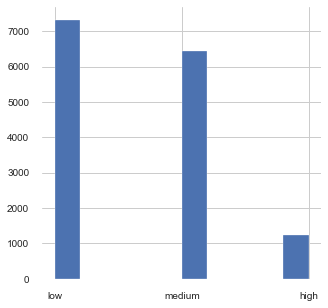

In [51]:
df.salary.hist(figsize=(5,5))
plt.show()

### 8. Показать распределение сотрудников по зарплатам совместно с департаментами  

In [81]:
df.loc[:,'employees'] = 1
pivot = pd.pivot_table(df, values = ['employees'], index = ['sales'], columns = ['salary'], aggfunc='count')
pivot

employees           
salary              1     2    3
sales                           
IT                609   535   83
RandD             364   372   51
accounting        358   335   74
hr                335   359   45
management        180   225  225
marketing         402   376   80
product_mng       451   383   68
sales            2099  1772  269
support          1146   942  141
technical        1372  1147  201

Text(0.5, 0, 'Департаменты')

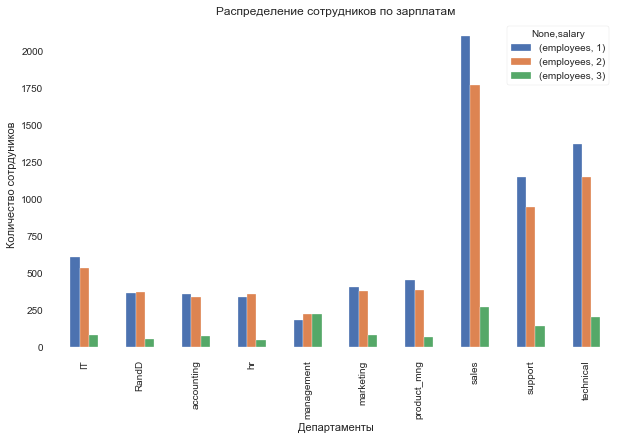

In [82]:
ax = pivot.plot(kind='bar', rot=90, figsize=(10, 6))
ax.set_title('Распределение сотрудников по зарплатам')
ax.set_ylabel('Количество сотрдуников')
ax.set_xlabel('Департаменты')

### 9. Сколько сотрудников покинули компанию

In [49]:
df[['left']].loc[df.left == 1].count()

left    3571
dtype: int64

### 10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию 

Для использования t-test необходимо будет проверить распределения на нормальность с помощью теста Шапиро и соотнести их дисперсии.

Первым шагом получим наиболее важные атрибуты.

In [60]:
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [63]:
df['salary'] = df['salary'].map({'low': 1, 'medium': 2, 'high': 3})

In [64]:
model=RandomForestClassifier(n_estimators=100)

# выделяем данные и классы
input_x = df.iloc[:,:10]
del input_x['left']
del input_x['sales']
Y = df['left']

X_train, X_test, y_train, y_test = train_test_split(input_x, Y, test_size=0.3)
# обучаем модель
model.fit(X_train,y_train)

model_pred = model.predict(X_test)
print(classification_report(y_test, model_pred))
model.score(X_test, y_test)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3440
           1       0.99      0.95      0.97      1060

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



0.9875555555555555

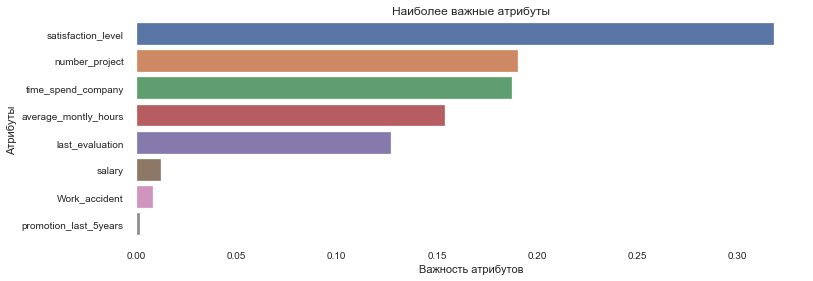

In [65]:
headers = list(X_train.columns.values)
feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)
f, ax = plt.subplots(figsize=(12, 4))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.show()

In [83]:
# предположим, что уволившиеся сотрудники имели низкую оценку
# нулевая гипотеза - оценки у уволившихся сотрудников и работающих  - одинаковы
# альтернативная гипотеза - оценки у уволившихся сотрудников и работающих  - разные
left_1 = df[df['left'] == 1]['last_evaluation']
onboard_1 = df[df['left'] == 0]['last_evaluation']

print(stats.mannwhitneyu(left_1, onboard_1, use_continuity=True, alternative='two-sided'))

MannwhitneyuResult(statistic=20337201.0, pvalue=0.7650349266478002)


Оценка не влияла на увольнение (принимаем нулевую гипотезу, так как P-value>0.05).

In [84]:
# Предположим, что увольнялись те, кто перерабатывал
df.groupby(['time_spend_company', 'left']).agg(['mean','count']).loc[:, ['average_montly_hours', 'employee']]

average_montly_hours      
                                        mean count
time_spend_company left                           
2                  0              199.956440  3191
                   1              210.773585    53
3                  0              199.451513  4857
                   1              147.377049  1586
4                  0              198.812238  1667
                   1              269.612360   890
5                  0              192.576562   640
                   1              246.337335   833
6                  0              199.654224   509
                   1              242.244019   209
7                  0              200.744681   188
8                  0              193.802469   162
10                 0              199.224299   214

Видно, что после 7 лет работы сотрудники не увольняются.  
Первые два года работы затраченное время почти одинаково.  
4-5 лет работы - интересны для рассмотрения.

In [86]:
# нулевая гипотеза - от выработаных в месяц часов количество уволившихся не зависит
# альтернативная гипотеза - от выработаных в месяц часов количество уволившихся зависит
left_2 = df[df['left'] == 1]['average_montly_hours']
onboard_2 = df[df['left'] == 0]['average_montly_hours']
stats.mannwhitneyu(left_2, onboard_2, use_continuity=True, alternative='two-sided')

MannwhitneyuResult(statistic=21689600.5, pvalue=1.2769565984354332e-08)

In [87]:
stats.ttest_ind(left_2, onboard_2)

Ttest_indResult(statistic=8.752254731850009, pvalue=2.3113035567540143e-18)

Количество отработанных часов влияло на увольнение (отвергаем нулевую гипотезу, так как P-value<0.05).

In [89]:
# проверим зависимость от количества проектов
# нулевая гипотеза - от количества проектов количество уволившихся не зависит
# альтернативная гипотеза - от количества проектов количество уволившихся зависит
left_3 = df[df['left'] == 1]['number_project']
onboard_3 = df[df['left'] == 0]['number_project']
stats.mannwhitneyu(left_2, onboard_2, use_continuity=True, alternative='two-sided')

MannwhitneyuResult(statistic=21689600.5, pvalue=1.2769565984354332e-08)

Количество проектов влияло на увольнение (отвергаем нулевую гипотезу, так как P-value<0.05).